In [ ]:
import pandas as pd

# Load the data
file_path = 'drive/MyDrive/filtered.tsv'
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


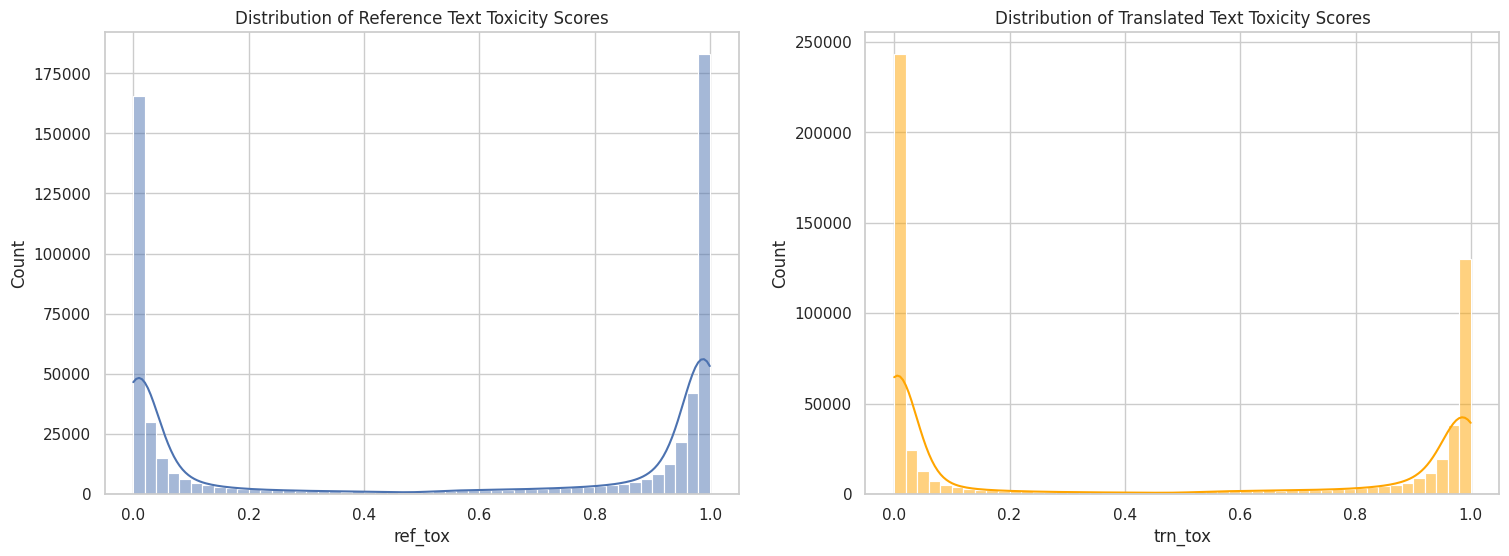

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of reference and translated toxicity scores
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data['ref_tox'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Reference Text Toxicity Scores')

sns.histplot(data['trn_tox'], bins=50, ax=axes[1], color='orange', kde=True)
axes[1].set_title('Distribution of Translated Text Toxicity Scores')

plt.show()


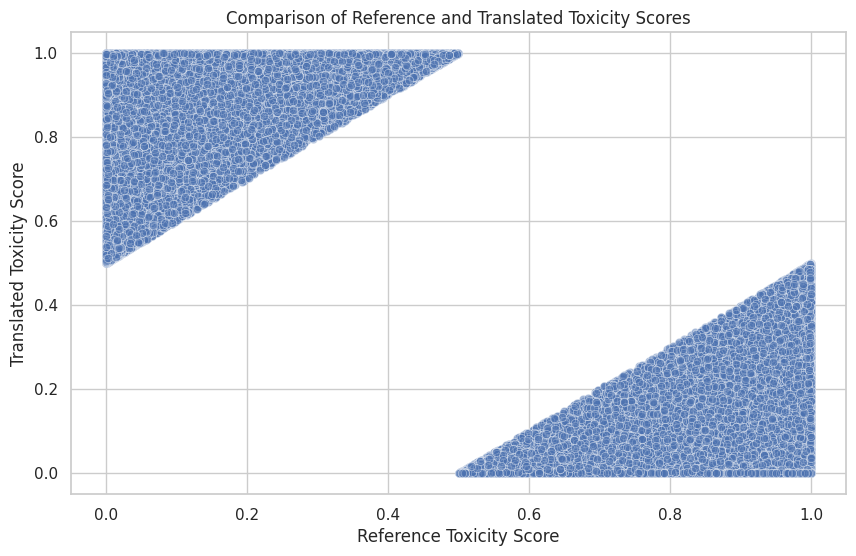

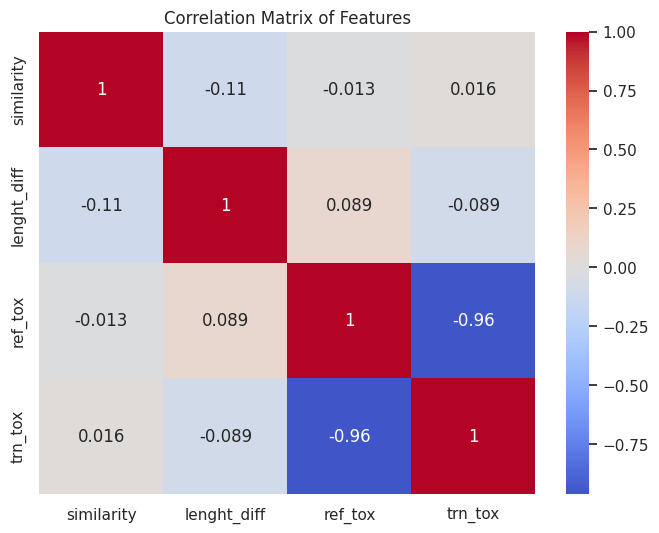

In [ ]:
# Scatter plot comparing reference and translated toxicity scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ref_tox', y='trn_tox', data=data, alpha=0.5)
plt.title('Comparison of Reference and Translated Toxicity Scores')
plt.xlabel('Reference Toxicity Score')
plt.ylabel('Translated Toxicity Score')
plt.show()

# Correlation matrix to understand the relationship between variables
correlation_matrix = data[['similarity', 'lenght_diff', 'ref_tox', 'trn_tox']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
from scipy.stats import linregress

# Calculate the decrease in toxicity
data['tox_decrease'] = data['ref_tox'] - data['trn_tox']

# Correlation between decrease in toxicity and similarity/length difference
correlation_similarity = data['similarity'].corr(data['tox_decrease'])
correlation_lenght_diff = data['lenght_diff'].corr(data['tox_decrease'])

# Performing a linear regression between decrease in toxicity and similarity
slope_similarity, intercept_similarity, r_value_similarity, p_value_similarity, std_err_similarity = linregress(
    data['similarity'], data['tox_decrease'])

# Performing a linear regression between decrease in toxicity and length difference
slope_lenght_diff, intercept_lenght_diff, r_value_lenght_diff, p_value_lenght_diff, std_err_lenght_diff = linregress(
    data['lenght_diff'], data['tox_decrease'])

(correlation_similarity, correlation_lenght_diff), (r_value_similarity**2, r_value_lenght_diff**2)


((-0.014362637050068128, 0.08972047175115028),
 (0.0002062853430319897, 0.008049763051248958))

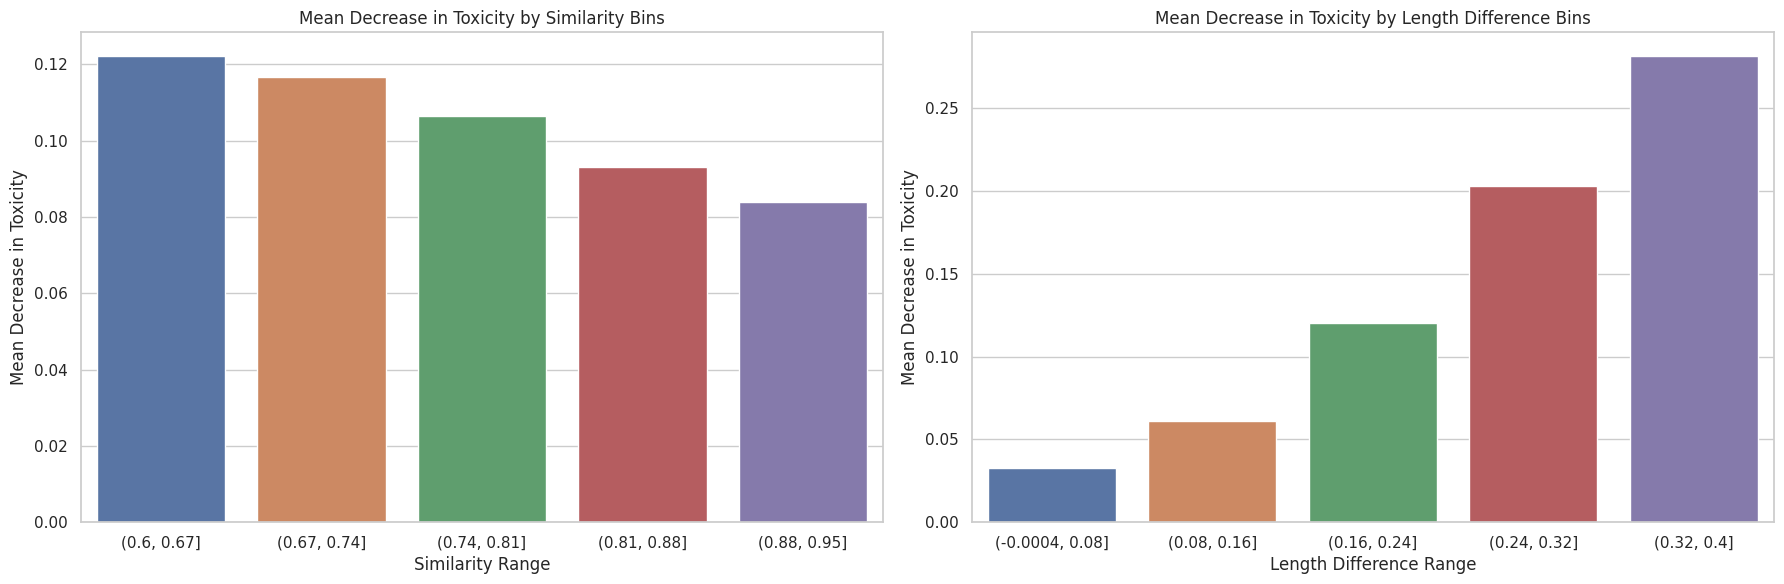

In [ ]:
# Define bins for similarity and length difference
similarity_bins = pd.cut(data['similarity'], bins=5)
length_diff_bins = pd.cut(data['lenght_diff'], bins=5)

# Calculate the mean decrease in toxicity for each bin
grouped_similarity = data.groupby(similarity_bins)['tox_decrease'].mean().reset_index()
grouped_length_diff = data.groupby(length_diff_bins)['tox_decrease'].mean().reset_index()

# Visual analysis
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for similarity bins
sns.barplot(x='similarity', y='tox_decrease', data=grouped_similarity, ax=ax[0])
ax[0].set_title('Mean Decrease in Toxicity by Similarity Bins')
ax[0].set_xlabel('Similarity Range')
ax[0].set_ylabel('Mean Decrease in Toxicity')

# Plot for length difference bins
sns.barplot(x='lenght_diff', y='tox_decrease', data=grouped_length_diff, ax=ax[1])
ax[1].set_title('Mean Decrease in Toxicity by Length Difference Bins')
ax[1].set_xlabel('Length Difference Range')
ax[1].set_ylabel('Mean Decrease in Toxicity')

plt.tight_layout()
plt.show()


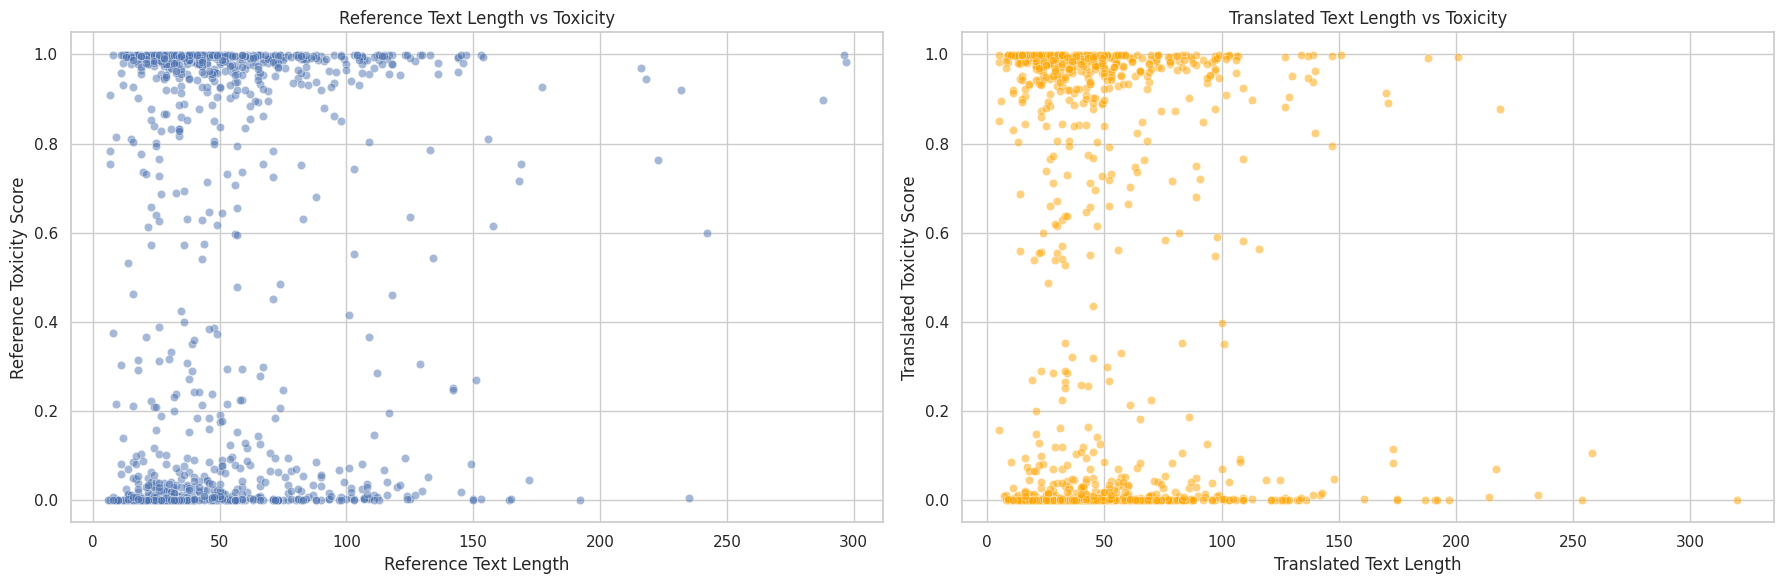

(0.013519662987862262, 0.010344863798806109)

In [ ]:
# Calculate the length of reference and translated texts
data['ref_length'] = data['reference'].apply(len)
data['trn_length'] = data['translation'].apply(len)

# Compute correlation of text lengths with toxicity scores
correlation_ref_length_tox = data['ref_length'].corr(data['ref_tox'])
correlation_trn_length_tox = data['trn_length'].corr(data['trn_tox'])

# Visual analysis of text length vs toxicity
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for reference text length vs toxicity
sns.scatterplot(x='ref_length', y='ref_tox', data=data.sample(1000, random_state=1), ax=ax[0], alpha=0.5)
ax[0].set_title('Reference Text Length vs Toxicity')
ax[0].set_xlabel('Reference Text Length')
ax[0].set_ylabel('Reference Toxicity Score')

# Scatter plot for translated text length vs toxicity
sns.scatterplot(x='trn_length', y='trn_tox', data=data.sample(1000, random_state=1), ax=ax[1], alpha=0.5, color='orange')
ax[1].set_title('Translated Text Length vs Toxicity')
ax[1].set_xlabel('Translated Text Length')
ax[1].set_ylabel('Translated Toxicity Score')

plt.tight_layout()
plt.show()

correlation_ref_length_tox, correlation_trn_length_tox


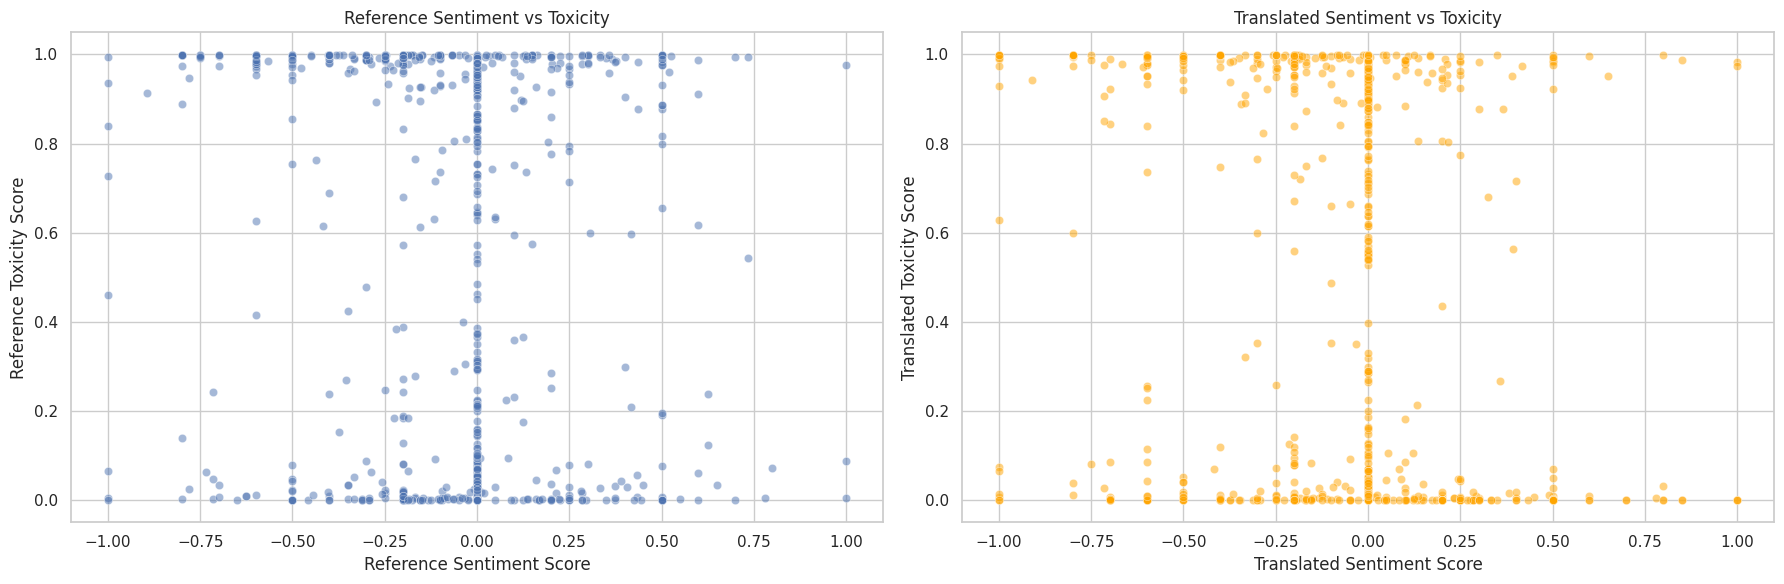

(-0.11817592208391621, -0.15746354707474988)

In [ ]:
from textblob import TextBlob

# Sample a subset of data for sentiment analysis to manage computation time
sample_data = data.sample(n=1000, random_state=1)

# Calculate sentiment polarity for reference and translated texts
sample_data['ref_sentiment'] = sample_data['reference'].apply(lambda text: TextBlob(text).sentiment.polarity)
sample_data['trn_sentiment'] = sample_data['translation'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Compute correlation of sentiment with toxicity scores
correlation_ref_sentiment_tox = sample_data['ref_sentiment'].corr(sample_data['ref_tox'])
correlation_trn_sentiment_tox = sample_data['trn_sentiment'].corr(sample_data['trn_tox'])

# Visual analysis of sentiment vs toxicity
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for reference sentiment vs toxicity
sns.scatterplot(x='ref_sentiment', y='ref_tox', data=sample_data, ax=ax[0], alpha=0.5)
ax[0].set_title('Reference Sentiment vs Toxicity')
ax[0].set_xlabel('Reference Sentiment Score')
ax[0].set_ylabel('Reference Toxicity Score')

# Scatter plot for translated sentiment vs toxicity
sns.scatterplot(x='trn_sentiment', y='trn_tox', data=sample_data, ax=ax[1], alpha=0.5, color='orange')
ax[1].set_title('Translated Sentiment vs Toxicity')
ax[1].set_xlabel('Translated Sentiment Score')
ax[1].set_ylabel('Translated Toxicity Score')

plt.tight_layout()
plt.show()

correlation_ref_sentiment_tox, correlation_trn_sentiment_tox


In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_tokenize(text):
    # Tokenize and convert to lower case
    words = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic words
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Quartiles of reference toxicity
quartiles_ref_tox = data['ref_tox'].quantile([0.25, 0.5, 0.75, 1.0])

# Most and least toxic texts based on reference toxicity scores
most_toxic_ref = data[data['ref_tox'] > quartiles_ref_tox[0.75]]['reference']
least_toxic_ref = data[data['ref_tox'] <= quartiles_ref_tox[0.25]]['reference']

# Sampling for computational efficiency
most_toxic_ref_sample = most_toxic_ref.sample(n=1000, random_state=1)
least_toxic_ref_sample = least_toxic_ref.sample(n=1000, random_state=1)

# Tokenize and clean the most and least toxic texts
most_toxic_tokens = most_toxic_ref_sample.apply(clean_tokenize).sum()
least_toxic_tokens = least_toxic_ref_sample.apply(clean_tokenize).sum()

# Get the most common words in the most and least toxic texts
most_toxic_word_freq = Counter(most_toxic_tokens).most_common(20)
least_toxic_word_freq = Counter(least_toxic_tokens).most_common(20)

most_toxic_word_freq, least_toxic_word_freq



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([('shit', 127),
  ('fucking', 126),
  ('fuck', 94),
  ('damn', 67),
  ('get', 65),
  ('know', 47),
  ('na', 42),
  ('ass', 41),
  ('like', 38),
  ('gon', 37),
  ('man', 35),
  ('oh', 31),
  ('shut', 26),
  ('goddamn', 26),
  ('stupid', 25),
  ('could', 25),
  ('one', 25),
  ('got', 24),
  ('think', 23),
  ('crap', 23)],
 [('like', 43),
  ('know', 38),
  ('get', 38),
  ('got', 29),
  ('one', 28),
  ('going', 27),
  ('man', 27),
  ('could', 25),
  ('go', 23),
  ('see', 22),
  ('back', 21),
  ('little', 21),
  ('said', 20),
  ('would', 20),
  ('let', 19),
  ('killed', 19),
  ('think', 18),
  ('na', 18),
  ('want', 18),
  ('oh', 17)])